#### Capstone Project - Data Visualisation (Titanic Dataset) - By Alex Chu

Exploratory Data Analysis on the Titanic Dataset


In [1]:
#Library import
import pandas as pd
import numpy as np

from scipy import stats
from mlxtend.preprocessing import minmax_scaling

import seaborn as sns
import missingno

import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import statsmodels.api as sm


<font size="5"><strong>Overview of data</strong></font>

In [2]:
# Read the data
df_t = pd.read_csv("titanic.csv")
df_t.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
print(f'Data shape is {df_t.shape}')

Data shape is (891, 12)


In [4]:
# To understand the kind of data we have
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<font size="5"><strong>Variables analysis</strong></font>

<font size="3"><strong>Categorical data overview</strong></font>

In [5]:
# To understand how much unique data within the categorical columns
df_t.describe(include='object').T

,count,unique,top,freq
Name,891,891,"Braund, Mr. Owen Harris",1
Sex,891,2,male,577
Ticket,891,681,347082,7
Cabin,204,147,B96 B98,4
Embarked,889,3,S,644


<font size="3"><strong>Numerical data overview</strong></font>

In [6]:
# To understand the statistics of numerical data
df_t.describe().T.style.bar(color='#ADD8E6')

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.000000,446.000000,257.353842,1.000000,223.500000,446.000000,668.500000,891.000000
Survived,891.000000,0.383838,0.486592,0.000000,0.000000,0.000000,1.000000,1.000000
Pclass,891.000000,2.308642,0.836071,1.000000,2.000000,3.000000,3.000000,3.000000
Age,714.000000,29.699118,14.526497,0.420000,20.125000,28.000000,38.000000,80.000000
SibSp,891.000000,0.523008,1.102743,0.000000,0.000000,0.000000,1.000000,8.000000
Parch,891.000000,0.381594,0.806057,0.000000,0.000000,0.000000,0.000000,6.000000
Fare,891.000000,32.204208,49.693429,0.000000,7.910400,14.454200,31.000000,512.329200


Here is the description of each column:

<strong>PassengerId</strong> - [Integer][Continuous] The unique Id for each passenger

<strong>Survived</strong> - [Integer][Categorical] A binary variable taking the value 1 if the passenger survived and 0 if they didn't in the data

<strong>Pclass</strong> - [Integer][Categorical] The ticket class of the passenger which can be 1,2 or 3 where 1 is the highest class

<strong>Name</strong> - [String][Categorical] The full name of the passenger

<strong>Sex</strong> - [String][Categorical] Whether or not the passenger is male or female

<strong>Age</strong> - [double][Continuous] The age in years

<strong>SibSP</strong> - [Integer][Continuous] The total number of siblings and spouses aboard the Titanic

<strong>Parch</strong> - [Integer][Continuous] The total number of parents and children aboard the Titanic

<strong>Ticket</strong> - [String][Categorical] The ticket number

<strong>Fare</strong> - [double][Continuous] The cost of the passenger's ticket

<strong>Cabin</strong> - [String][Categorical] The cabin number of the passenger

<strong>Embarked</strong> -[String][Categorical] The port from which the passenger embarked which is one of Cherbourg(C), Queenstown(Q), Southampton(S)



<font size="3"><strong>General statistics of the dataset</strong></font>

Survived

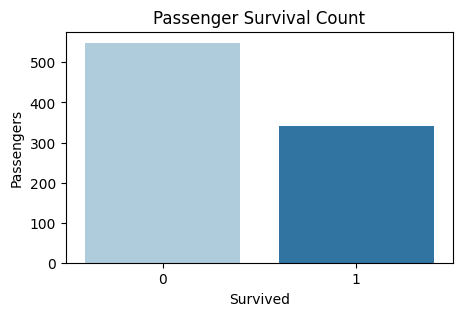

In [7]:
# How many passagers survived
fig, ax = plt.subplots(figsize=(5, 3))

sns.countplot(x='Survived', data=df_t, palette='Paired')
plt.xlabel('Survived')
plt.ylabel('Passengers')
plt.title('Passenger Survival Count')
plt.show()

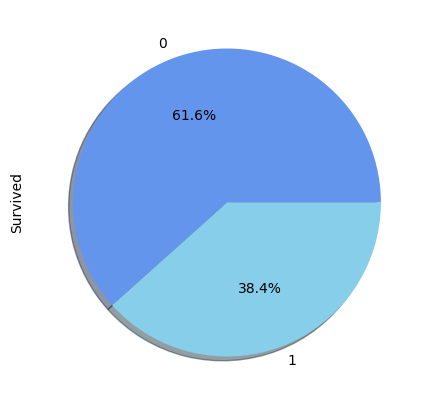

In [8]:
# Show the survival rate of our dataset in a pie chart
colors = ["#6495ED", "skyblue"]

f,ax=plt.subplots(figsize=(5,5))
df_t.Survived.value_counts().plot.pie(autopct='%1.1f%%',ax=ax,colors=colors,shadow=True)
plt.show()

Sex

male      577
female    314
Name: Sex, dtype: int64


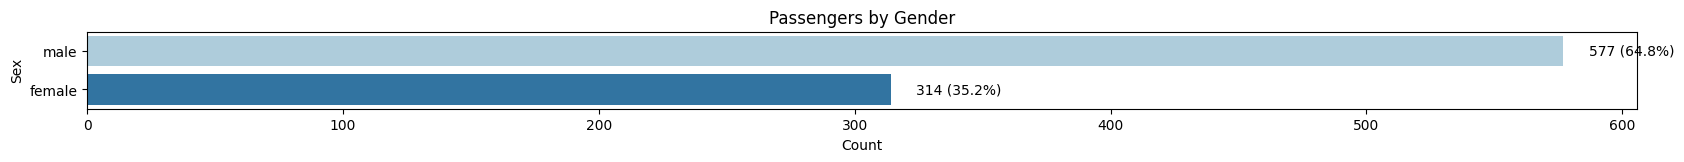

In [9]:
# Create bar chart to show how many passages are Male and Female
fig, ax = plt.subplots(figsize=(20, 1))
sns.countplot(y='Sex', data=df_t, palette='Paired')
plt.xlabel('Count')
plt.ylabel('Sex')
plt.title('Passengers by Gender')

# To review the precentage of gender
gender_counts = df_t['Sex'].value_counts()
total_passengers = gender_counts.sum()

for i, count in enumerate(gender_counts):
    percentage = (count / total_passengers) * 100
    ax.text(count + 10, i, f'{count} ({percentage:.1f}%)', va='center')
    
print(df_t.Sex.value_counts())
plt.show()

Age

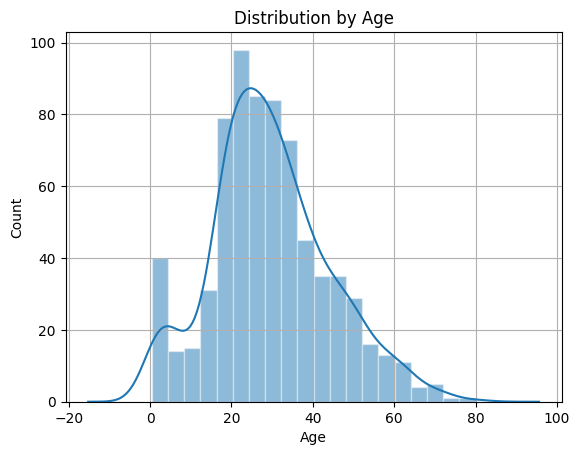

In [10]:
# The age distribution 
sns.histplot(df_t["Age"],kde=True,kde_kws=dict(cut=4),edgecolor=(1,1,1,.4))
plt.title("Distribution by Age")
plt.grid()
plt.show()

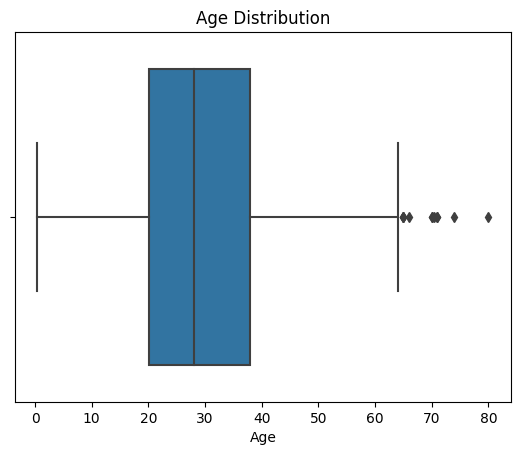

In [11]:
sns.boxplot(x=df_t["Age"])
plt.title("Age Distribution")
plt.xlabel("Age")
plt.show()

Embarked

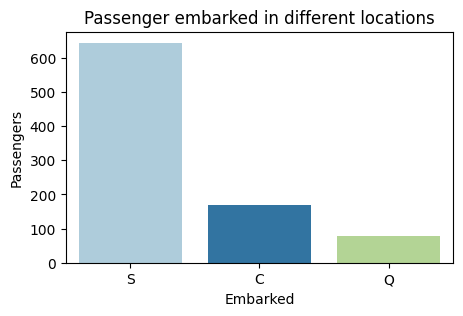

In [12]:
# Number of passagers embarked in different locations

fig, ax = plt.subplots(figsize=(5, 3))

sns.countplot(x='Embarked', data=df_t, palette='Paired')
plt.xlabel('Embarked')
plt.ylabel('Passengers')
plt.title('Passenger embarked in different locations')
plt.show()

Ticket class

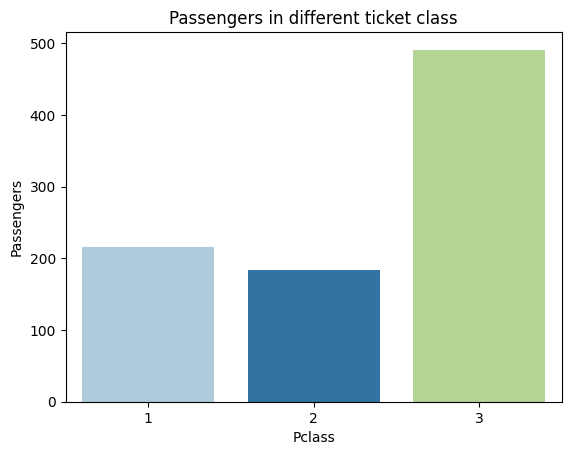

In [13]:
# Number of passagers in ticket class

sns.countplot(x='Pclass', data=df_t, palette='Paired')
plt.xlabel('Pclass')
plt.ylabel('Passengers')
plt.title('Passengers in different ticket class')
plt.show()

Fare:

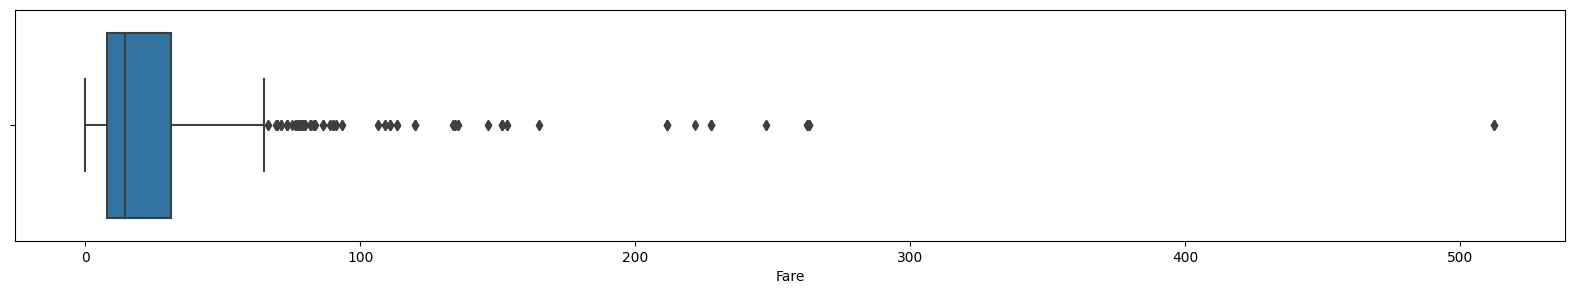

In [14]:
# Create a box plot to show the fare distribution
data_fare = df_t['Fare']
f, ax = plt.subplots(figsize=(20, 3))
fig = sns.boxplot(x=data_fare)  
plt.show()


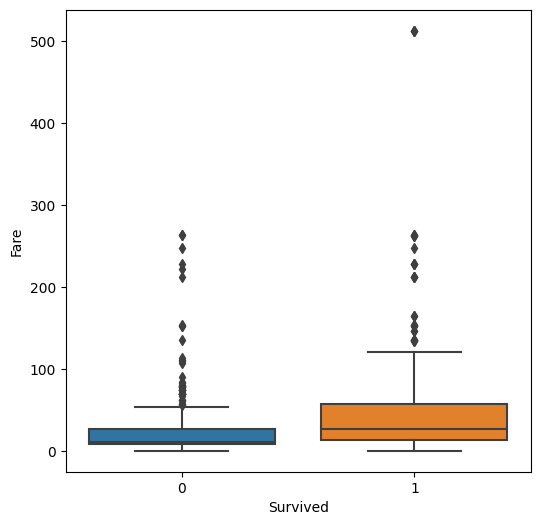

In [15]:
# Create a combined box plots to observe the outliers of the fare in different survival group
data_fare_group = pd.concat([df_t['Survived'], df_t['Fare']], axis=1)
f, ax = plt.subplots(figsize=(6, 6))
fig = sns.boxplot(x=df_t['Survived'], y=df_t['Fare'], data=data_fare_group)


Overview of dataset statistics:

The simple statistics of the dataset above showed us more than half of the passagers died in the incident.

Male gender is the dominant gender in  the passagers dataset.

People in middle age is the major passengers in dataset.

Cherbourg is the most popular port for the passengers to embark.

Majority of passengers were paying class 3 tickets.

<font size="5"><strong>Data cleaning</strong></font>

### Identifying irrelevant information:

In [16]:
df_t.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Based on the columns above and the data showed previously, I consider the column <strong>PassengerId, Name and Ticket</strong> are irrelevant for our EDA.
We will drop the columns after we search for any other duplicated rows or null data.

### Identifying duplicated rows:

In [17]:
# Checking duplicate rows
duplicates = df_t.duplicated()
num_duplicates = duplicates.sum()
num_duplicates

0

No duplicated rows found

### Identifying null data/missing values, fixing structural errors:

In [18]:
for column_name in df_t.columns:
    unique_values = df_t[column_name].unique()
    print(f"'{column_name}': {unique_values}")

'PassengerId': [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243

We can observe the null data exist as 'nan' only.
No Structural errors: naming conventions, typos, or incorrect capitalization where identified.

Number of missing values in columns:

In [19]:
# Get the number of missing data points per column
null_t = df_t.isnull().sum()
null_t

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missingno Matrix:

<AxesSubplot:>

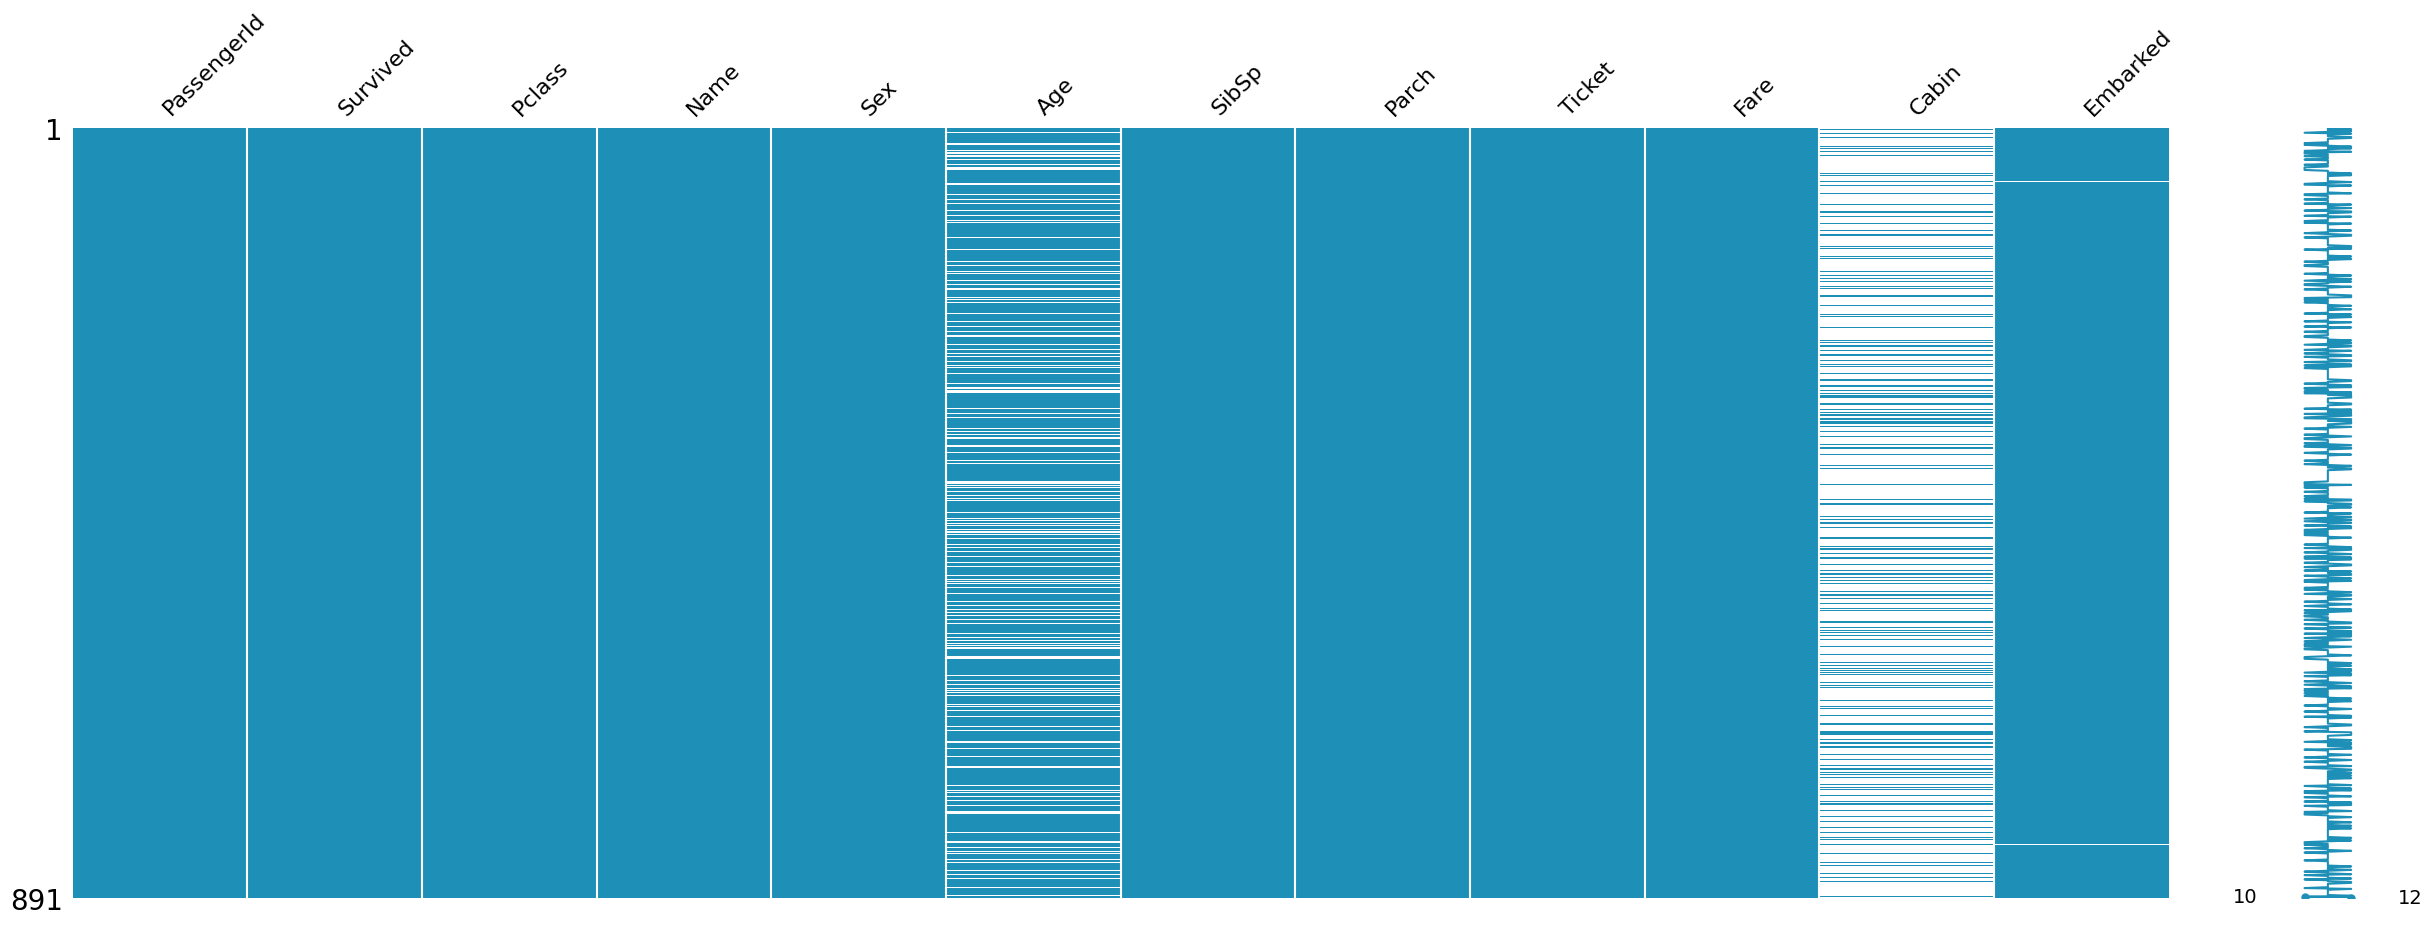

In [20]:
# Plot graphic of missing values
color_oceanblue = (0.11765, 0.56471, 0.71765)  # RGB values for ocean blue
missingno.matrix(df_t, figsize=(30, 10), color=color_oceanblue)

In [21]:
print("% of Cabin null values: ", (df_t['Cabin'].isnull().sum()/df_t.shape[0])*100)
print("% of Age null values: ",(df_t['Age'].isnull().sum()/df_t.shape[0])*100)
print("% of Embarked null values: ",(df_t['Embarked'].isnull().sum()/df_t.shape[0])*100)

% of Cabin null values:  77.10437710437711
% of Age null values:  19.865319865319865
% of Embarked null values:  0.22446689113355783


Theoretically, 25 to 30% is the maximum missing values are allowed, beyond which we might want to drop the variable from analysis.

We can note that >25% of Cabin Data is null, hence it might be reasonable to just drop it completely.

Age:
As we can see that age and cabin have missing values and we can adjust the age values by guessing the age as enough data is availabe to make predictions but in the cabin major data is missing so we will drop this

### Dropping the columns:

We can note that <strong>>77% of Cabin Data is null</strong>, hence it might be reasonable to just drop it completely.
And we will also drop the iirelevant columns we mentioned before.

In [22]:
#Drop all the irrelevant and insignificant columns
df_t = df_t.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

### Dropping the null data:

We have 2 null data in Embarked column, we will drop the rows:

In [23]:
df_t = df_t.dropna(subset=['Embarked'])

### Adjusting null data on age:

Instead of dropping 177 rows of null data on Age, we will try to impute missing values. The best way is to replace them with median rather than mean beacause of the existence of outliers.
In different Pclass, there is different distribution of age, we can assign the median of the age into the null data according to the Pclass.

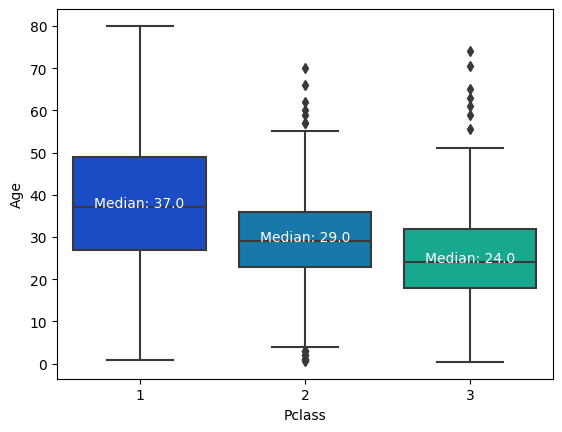

In [24]:
#  To show Age pattern in different Pclass by plotting blox plots
sns.boxplot(x='Pclass', y='Age', data=df_t, palette='winter')

# Calculate the median values of age for each Pclass
medians = df_t.groupby('Pclass')['Age'].median().values

# Add the median values to the plot
for i, median in enumerate(medians):
    plt.text(i, median, f'Median: {median}', horizontalalignment='center', color='white')

plt.show()

In [25]:
#  Assigning the median of the age into the null data according to the Pclass by a function.
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age
        
# Apply this function to make changes
df_t["Age"] = df_t[['Age', 'Pclass']].apply(impute_age, axis = 1)

To confirm all the null data has been adjusted and removed:

In [26]:
# Checking the null data after adjustment 
new_null_t = df_t.isnull().sum()
new_null_t

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

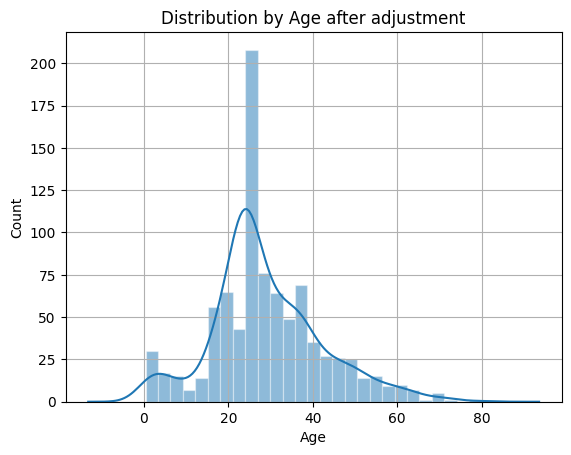

In [27]:
# The age distribution after adjustment
sns.histplot(df_t["Age"],kde=True,kde_kws=dict(cut=4),edgecolor=(1,1,1,.4))
plt.title("Distribution by Age after adjustment")
plt.grid()
plt.show()

<font size="3"><strong>Definding age group</strong></font>

Information about Age:
count    889.000000
mean      29.019314
std       13.209814
min        0.420000
25%       22.000000
50%       26.000000
75%       36.500000
max       80.000000
Name: Age, dtype: float64


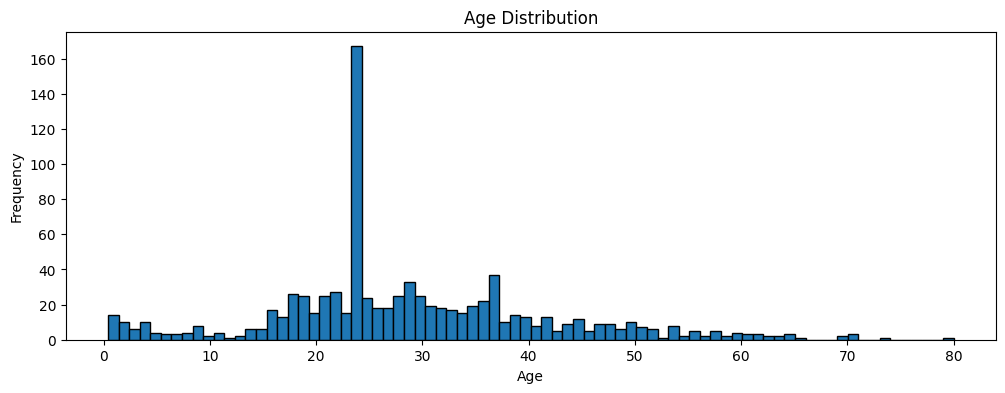

In [28]:
print(f"Information about Age:\n{df_t['Age'].describe()}")

# Create the histogram
fig, ax = plt.subplots(figsize=(12, 4))

# Create the histogram
ax.hist(df_t["Age"], bins=80, edgecolor='black')

ax.set_xlabel('Age')
ax.set_ylabel('Frequency')
ax.set_title('Age Distribution')

plt.show()

To understand the contributing factor of age, I would divide the age group as following (based on the fact that 18 is the age in the UK considered as adult and the above age distribution):

The Age group we defined is:

Group 1: from 0 - 12 (Children)

Group 2: from 13 - 17 (Adolescents)

Group 3: from 18 - 30 (Adults 1)

Group 4: from 31 - 60 (Adults 2)

Group 5: Ages 61+ (Seniors)

In [29]:
# Defind Age_Group
df_t['Age_Group'] = df_t['Age'].apply(lambda x: 1 if x <= 12 else (2 if x <= 17 else (3 if x <= 30 else (4 if x <= 60 else 5))))

# Look at the group size 
age_group_counts = df_t.groupby('Age_Group').size()
age_group_counts 

Age_Group
1     69
2     44
3    443
4    312
5     21
dtype: int64

Age group distribution:

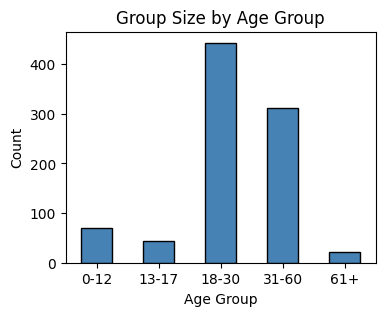

In [30]:
# Create a copy of the DataFrame
df_copy = df_t.copy()

fig, ax = plt.subplots(figsize=(4, 3))

bin_labels = ['0-12', '13-17', '18-30', '31-60', '61+']
age_bins = [0, 12, 17, 30, 60, df_copy['Age'].max()]

# Create a new Series without modifying the original DataFrame
age_group = pd.cut(df_copy['Age'], bins=age_bins, labels=bin_labels)
age_group_counts = age_group.value_counts().sort_index()

age_group_counts.plot(kind='bar', edgecolor='black', ax=ax, width=0.5, color='steelblue')

ax.set_xlabel('Age Group')
ax.set_ylabel('Count')
ax.set_title('Group Size by Age Group')

plt.xticks(rotation=0)

plt.show()

<font size="3"><strong>Definding fare class</strong></font>

Information about Fare:
count    889.000000
mean      32.096681
std       49.697504
min        0.000000
25%        7.895800
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64


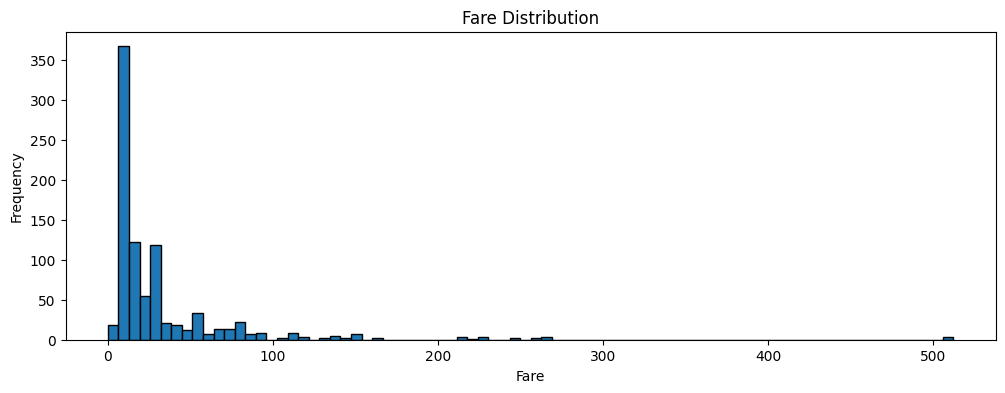

In [31]:
print(f"Information about Fare:\n{df_t['Fare'].describe()}")

fig, ax = plt.subplots(figsize=(12, 4))

# Create the histogram
ax.hist(df_t['Fare'], bins=80, edgecolor='black')

ax.set_xlabel('Fare')
ax.set_ylabel('Frequency')
ax.set_title('Fare Distribution')

plt.show()

From the previous boxplot graph and the bar chart above we can observe there are outliers (fare>500), we can extract the row to see is there any significant value or could we correct it.


### Filtering unwanted/keeping outliers:

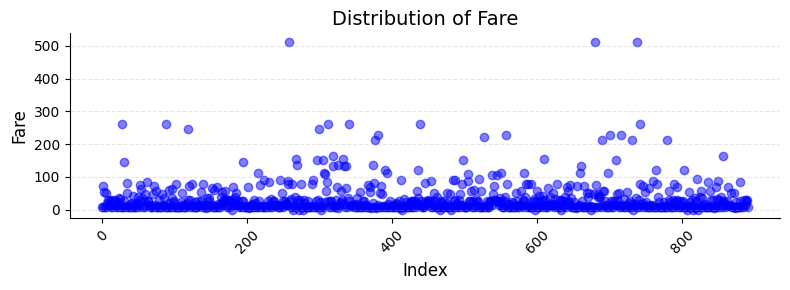

In [32]:
fig, ax = plt.subplots(figsize=(8, 3))
ax.scatter(df_t.index, df_t['Fare'], color='b', alpha=0.5)
ax.set_xlabel('Index', fontsize=12)
ax.set_ylabel('Fare', fontsize=12)
ax.set_title('Distribution of Fare', fontsize=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

In [33]:
# Search for the rows where Fare>500
df_t[df_t['Fare'] > 500]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_Group
258,1,1,female,35.0,0,0,512.3292,C,4
679,1,1,male,36.0,0,1,512.3292,C,4
737,1,1,male,35.0,0,0,512.3292,C,4


Considering that no entry or measurement error could be easily observed here, and the data makes senses (higher fare should be with high Pclass), we would keep the outliers as they are significant to out analysis.

Fare in 1912:

Third Class: £7

Second Class: £12

First Class Berth: £30

First class suite: £870

Base on the fare and the distribution of the data, I will make the fare group as:

Group 1: from 0 - £7 

Group 2: from £8 - £12 

Group 3: from £13- £30 

Group 4: from £30- £100 

Group 5: More than £100 


In [34]:
# Defind Fare_Class
df_t['Fare_Class'] = df_t['Fare'].apply(lambda x: 1 if x <= 7 else (2 if x <= 12 else (3 if x <= 30 else (4 if x <= 100 else 5))))

# Look at the group size 
fare_class_counts = df_t.groupby('Fare_Class').size()
fare_class_counts 

Fare_Class
1     28
2    346
3    283
4    179
5     53
dtype: int64

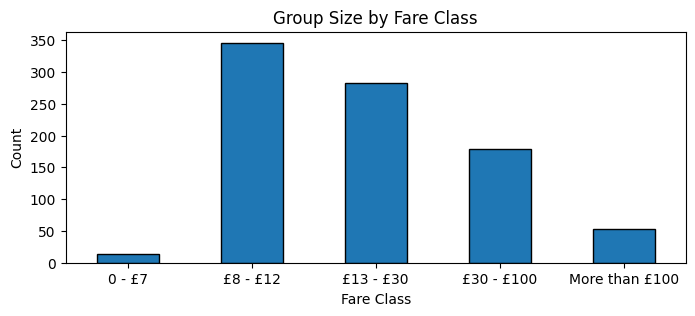

In [35]:
# Create a copy of the DataFrame
df_copy = df_t.copy()

fig, ax = plt.subplots(figsize=(8, 3))

fare_class_labels = ['0 - £7', '£8 - £12', '£13 - £30', '£30 - £100', 'More than £100']
fare_bins = [0, 7, 12, 30, 100, df_copy['Fare'].max()]

# Create a new Series without modifying the original DataFrame
fare_group = pd.cut(df_copy['Fare'], bins=fare_bins, labels=fare_class_labels)
fare_class_counts = fare_group.value_counts().sort_index()

fare_class_counts.plot(kind='bar', edgecolor='black', ax=ax)

ax.set_xlabel('Fare Class')
ax.set_ylabel('Count')
ax.set_title('Group Size by Fare Class')

plt.xticks(rotation=0)

plt.show()

<font size="5"><strong>Exploratory Data Analysis</strong></font>

From the data overview above, we have categorical and numerical data. Numerical data is be easily estimated the correlation with each other by numbers directly, while categorical data is easier to be illustrated in graphic visualization if they need to be found the correlation with numerical variable.
I will seperate my data analysis of important factors in determining survival of the Titanic incident in two different approaches: categorical variables and numerical variables.

<font size="3"><strong>Categorical variables</strong></font>

<strong>Survived</strong> - [Integer][Categorical] We consider it as dependent variales here, as it is the key result we are trying to explore all the factors affecting it. It is a categorical data but we has it input as a number already.

<strong>Pclass</strong> - [Integer][Categorical] One of the factor we will estimate the reletionship with Survived, it has it input as a number already.

<strong>Name</strong> - [String][Categorical] We may not consider to analyse this factor in this task, as it has 891 unique data and we can also assume name is not a significant independent variable we would like to get insights from. Having said that, the 'Name' column does contain information like Mr, Mrs, Miss, Ms may show us insight of how gender affect the survived. But we have 'Sex' column here to explore the significance.

<strong>Sex</strong> - [String][Categorical] We can keep the data as catergorical or change it into numerical to stimate the reletionship with Survived.

<strong>Ticket</strong> - [String][Categorical] As we explored above, there is 681 unique data, We may not consider to analyse this factor in this task.  We can also assume ticket is not a significant independent variable we would like to get insights from even though it may show some insight what Cabin they stayed in or the fare price.

<strong>Cabin</strong> - [String][Categorical] We have dropped this column of variable already because of high persentage of missing values.

<strong>Embarked</strong> -[String][Categorical] We can keep the data as catergorical or change it into numerical to stimate the reletionship with Survived.

<font size="3"><strong>Numerical  variables (including categorical variables changed into numerical)</strong></font>

<strong>PassengerId</strong> - [Integer][Continuous] We will not analyse this as a factor as the value is insignificant for our analysis here. Column dropped.

<strong>Survived</strong> - [Integer][Categorical] It is consdiered as categorical but it is input as a number.

<strong>Pclass</strong> - [Integer][Categorical] It is consdiered as categorical but it is input as a number.

<strong>Sex</strong> - [String][Categorical] We will convert into numerical data to analyse as well.

<strong>Age</strong> - [double][Continuous] As numerical data. We will also put the data into age group (as categorical data) to analyse.

<strong>SibSP</strong> - [Integer][Continuous] As numerical data. We will also combine with Parch to convert it into a family size (as categorical data) to analyse as a factor.

<strong>Parch</strong> - [Integer][Continuous] As numerical data. We will also combine with SibSP to convert it into a family size as categorical data) to analyse as a factor.

<strong>Fare</strong> - [double][Continuous] As numerical data. We will also put the data into fare group (as categorical data) to analyse.

<strong>Embarked</strong> -[String][Categorical] The port from which the passenger embarked which is one of Cherbourg(C), Queenstown(Q), Southampton(S)

<font size="3"><strong>Numerical data with Survived </strong></font>

<strong>1. What is the most important factor in determining survival of the Titanic
incident?</font>

To answer this question, we need to have a overview of correlation of all variables to survival in our dataset.

Correlation heatmap is a good tool to visualize the strength of relationships between numerical variables. Before we do that, we can also convert the Sex and Embarked variable into numerical variable to get some insights from it.

In [36]:
# Converting 'Sex' and 'Emarked' column into numerical variable column
df_t['Sex_group'] = df_t['Sex'].map({'male': 0, 'female': 1})
df_t['Embarked_location'] = df_t['Embarked'].map({'S': 0, 'Q': 1, 'C': 2})

<font size="3"><strong>Heatmap </strong></font>

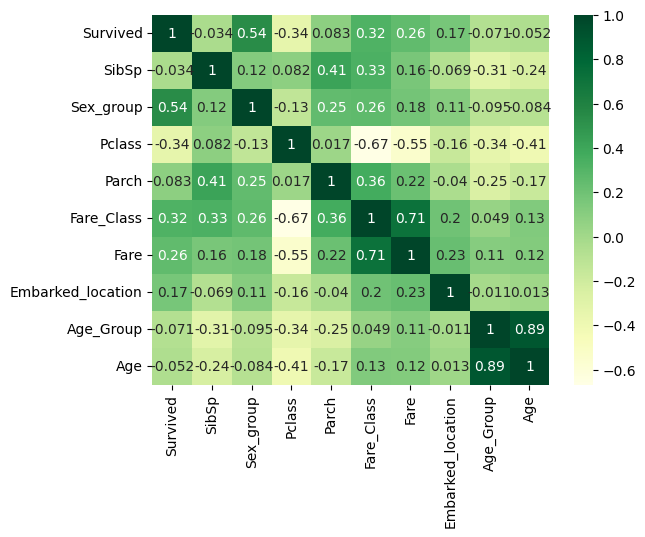

In [37]:
# Creating a heatmap to identify correlation between columns
# Sort the column names in alphabetical order so we can see compare different variables with 'Survived' easily
sorted_columns = sorted(df_t.columns, reverse=True)

# Create a new DataFrame with sorted columns
df_sorted = df_t[sorted_columns]

# Generate the correlation matrix and plot the heatmap
sns.heatmap(df_sorted.corr(), annot=True, cmap='YlGn')
plt.show()


We have strong correlations between:

Sex_group and Survival : 0.54 (positive correlation)

Pclass and Survival: -0.34 (negative correlation)

Fare/fare_class and Survival : 0.26/0.32 (positive correlation)


<font size="3"><strong>Correlation values</strong></font>

In [38]:
# Calculate correlation coefficients
correlations = df_t.corr()['Survived']

# Calculate p-values and R-squared values
p_values = []
r_squared_values = []
columns = []
correlation_coefficients = []

for column in df_t.drop('Survived', axis=1).columns:
    if df_t[column].dtype != object:
        # Remove missing values from the data
        mask = ~np.isnan(df_t['Survived']) & ~np.isnan(df_t[column])
        y = df_t['Survived'][mask]
        x = df_t[column][mask]

        model = sm.OLS(x, sm.add_constant(y))
        results = model.fit()
        p_values.append(results.pvalues[1])
        r_squared_values.append(results.rsquared)
        columns.append(column)
        correlation_coefficients.append(correlations[column])

# Create a DataFrame with column names, correlations, p-values, and R-squared values
results_df = pd.DataFrame({'Column': columns, 'Correlation': correlation_coefficients, 'p-value': p_values, 'R-squared': r_squared_values})

# Display the results DataFrame
print(results_df)

              Column  Correlation       p-value  R-squared
0             Pclass    -0.335549  7.776916e-25   0.112593
1                Age    -0.052051  1.209449e-01   0.002709
2              SibSp    -0.034040  3.106754e-01   0.001159
3              Parch     0.083151  1.313677e-02   0.006914
4               Fare     0.255290  1.079789e-14   0.065173
5          Age_Group    -0.070736  3.496558e-02   0.005004
6         Fare_Class     0.319690  1.424499e-22   0.102202
7          Sex_group     0.541585  6.682012e-69   0.293314
8  Embarked_location     0.169718  3.577414e-07   0.028804


Overall, the columns with significant relationships (based on low p-values(< 0.05)) with the 'Survived' column are: 'Pclass', 'Parch', 'Fare', 'Age_Group', 'Fare_Class', 'Sex_group', and 'Embarked_location'. These columns have correlations that suggest a meaningful association with the survival outcome. However, it's important to consider other factors such as effect size, domain knowledge, and potential confounding variables when interpreting the significance of relationships.

### Gender:

<strong>Gender is the most important factor in determining survival of the Titanic
incident. Female was likely to survive compared with male.    
Sex_group has the highest correlation coefficient (0.541585) among all the other variables, and its p-values is 6.682012 × 10<sup>-69</sup> which is <0.05. 
The following graphs will show the survival in different genders.</font>

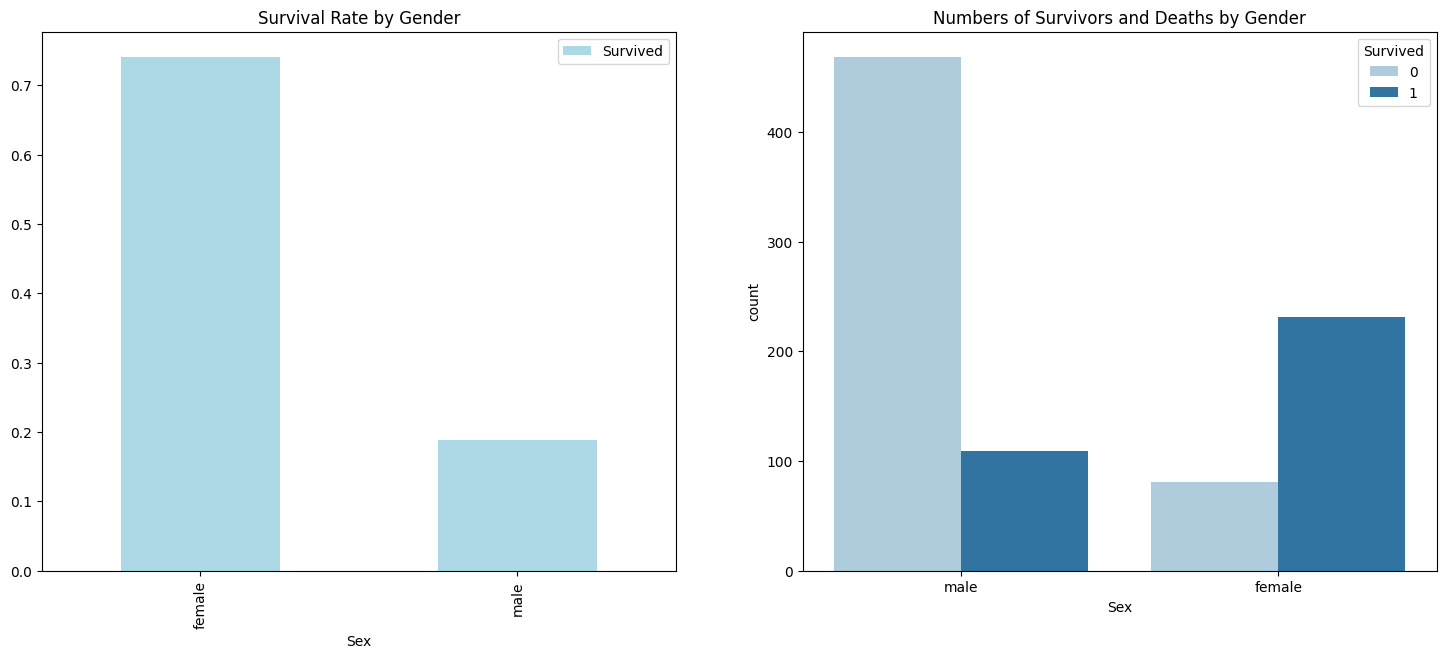

In [39]:
# To illustrate survival in different gender
f, ax = plt.subplots(1, 2, figsize=(18, 7))

df_t[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0], color=['#ADD8E6', '#6495ED'])

sns.countplot(x='Sex', hue='Survived', data=df_t, ax=ax[1], palette='Paired')

ax[0].set_title("Survival Rate by Gender")
ax[1].set_title("Numbers of Survivors and Deaths by Gender")

plt.show()

The dataset showed us this could be the important factor affect the survival.
However, we knew that the dataset contains the data with 577 male and 314 female, which may be not accurate enough to decide this factor is significantly affecting the result due to the significant sample size difference.


### Pclass:

<strong>The second important factor in determining survival of the Titanic incident is Pclass.
The upper-class the passengers were in, the higher chance to survive, which will be showen in the answer in the next question.</front>

<strong>In the movie, the upper-class passengers were given preference on lifeboats. Does this show in the data?</font>

Pclass has <strong>the correlation coefficient :-0.338481 (negative correlation), and its p-values is 7.776916 × 10 <sup>-25</sup> which is <0.05</strong>. 

The dataset shows the upper class (lower number in numerical variable) has higher survival rate, so 'the upper-class passengers were given preference on lifeboats' does make sense.

The following bar chart also illustrates this statement makes sense to both genders.
We have a major correlation between the Pclass/Sex column and survival,females at class 1 and 2 are almost certain to survive! Whilst males have a way lower survival chance across all classes!

The mean of survival rate of different genders in different Pclass:

In [40]:
mean_survival_rate = df_t.groupby(['Pclass', 'Sex'])['Survived'].mean()
print("Mean Survival Rate by Pclass and Sex:")
print(mean_survival_rate)

Mean Survival Rate by Pclass and Sex:
Pclass  Sex   
1       female    0.967391
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64


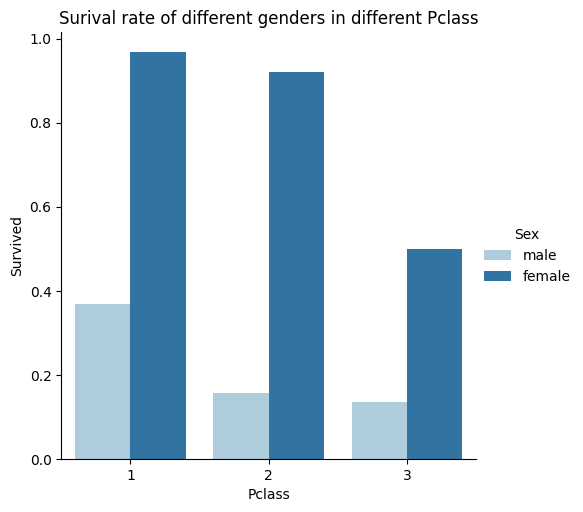

In [41]:
#create a bar graph with the correlation between Pclass and survival - by gender

sns.catplot(x='Pclass', y='Survived', hue='Sex', data=df_t, kind='bar', errorbar=None, palette='Paired')
plt.title("Surival rate of different genders in different Pclass")
plt.show()

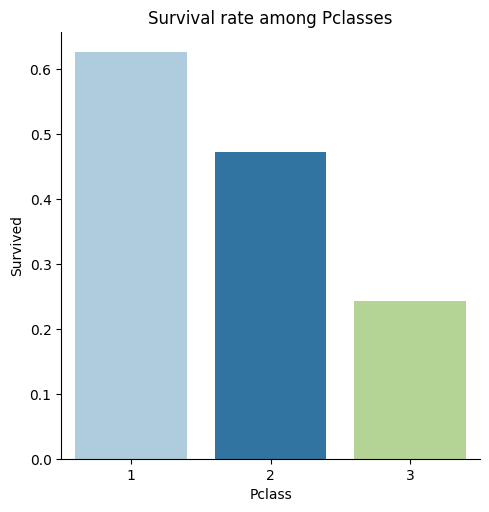

In [42]:
# Bar chart to show the correlation between Pclass and Survival
sns.catplot(x='Pclass', y='Survived', data=df_t, kind='bar', errorbar=None, palette='Paired')
plt.title("Survival rate among Pclasses")
plt.show()

### Age:

<strong>“Women and children first”. Was this the case?</font>

'Women first' is true was answered the previous question (Female was likely to survive compared with male, which is showed in the graphes). Sex_group has the highest correlation coefficient (0.541585) among all the other variables, and its p-values is 6.682012 × 10<sup>-69</sup> which is <0.05.
To find out if 'childeren first' is correct, we can try to understand the coorelation values and explore the relationship in the following graph.

Age: The correlation coefficient is -0.052051, and the p-value is 1.209449 x 10<sup>-1</sup>. The correlation coefficient indicates a weak negative correlation, and the p-value is relatively high, indicating an insignificant relationship. Therefore, there is an insignificant relationship between 'Age' and 'Survived'.

However, after we separated the age in different group:
Age_Group: The correlation coefficient becomes -0.070736, and the p-value turns to 3.496558 x 10<sup>-2</sup>. The correlation coefficient indicates a weak negative correlation, and the p-value suggests a statistically significant relationship as it is <0.05. Therefore, there is a significant negative relationship between 'Age_Group' and 'Survived', indicating that certain age groups have a higher likelihood of survival.

By separating the age group of children out, we find out the significant coefficient. So we can also day that 'children first' is also correct from the dataset given. “Women and children first” is likely correct.

We can see the survival in different age group in the following bar chart.


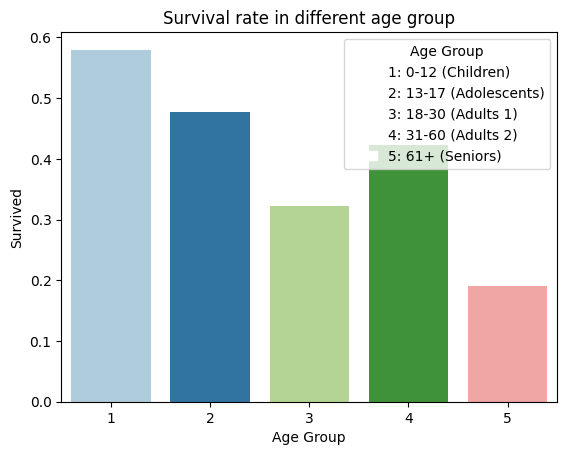

In [43]:
ax = sns.barplot(data=df_t, x='Age_Group', y='Survived', errorbar=None, palette='Paired')

ax.set_xlabel("Age Group")
ax.set_ylabel("Survived")

# Create a dictionary to map Age_Class values to their corresponding labels
age_class_labels = {
    1: "1: 0-12 (Children)",
    2: "2: 13-17 (Adolescents)",
    3: "3: 18-30 (Adults 1)",
    4: "4: 31-60 (Adults 2)",
    5: "5: 61+ (Seniors)"
}

# Create the handles and labels for the legend
handles = [plt.Rectangle((0, 0), 1, 1, color=ax.get_facecolor()) for _ in age_class_labels]
labels = list(age_class_labels.values())

# Create the legend using handles and labels
plt.legend(handles, labels, title="Age Group")

plt.title("Survival rate in different age group")
plt.show()

We can also see that younger people (expcet group of adult 2 has higher chance than adult 1) have relatively greater chances of survival.

<strong>Except children group, the death number is higher than the survival number in all other age group:</font>

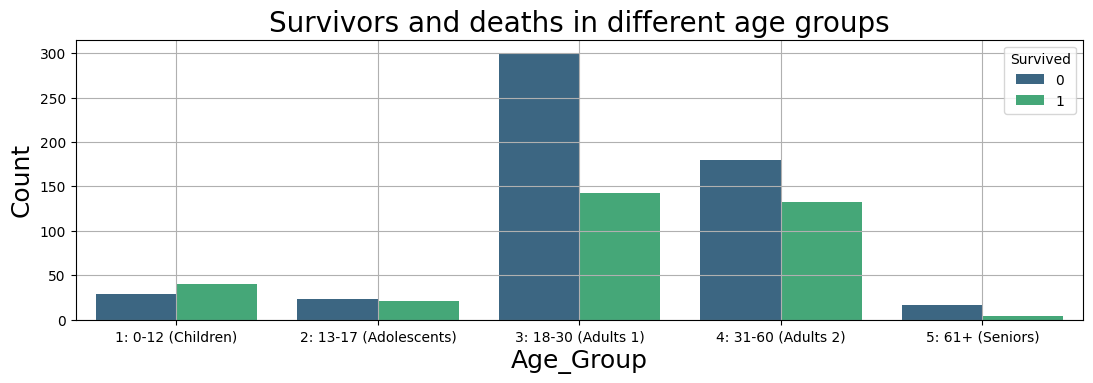

In [44]:
plt.figure(figsize=(13, 8))

# Create the subplot
plt.subplot(2, 1, 1)

# Plot the countplot
sns.countplot(x="Age_Group", data=df_t, hue="Survived", palette="viridis")

# Set the labels and title
plt.ylabel("Count", fontsize=18)
plt.xlabel("Age_Group", fontsize=18)
plt.title("Survivors and deaths in different age groups", fontsize=20)

# Set custom x-axis tick labels
age_class_labels = {
    1: "1: 0-12 (Children)",
    2: "2: 13-17 (Adolescents)",
    3: "3: 18-30 (Adults 1)",
    4: "4: 31-60 (Adults 2)",
    5: "5: 61+ (Seniors)"
}
plt.xticks(range(5), [age_class_labels[i] for i in range(1, 6)])

# Add gridlines
plt.grid(True)

# Show the plot
plt.show()

### Fare:

<strong>The people who paid more expensive fares had more chances of survival:</font>

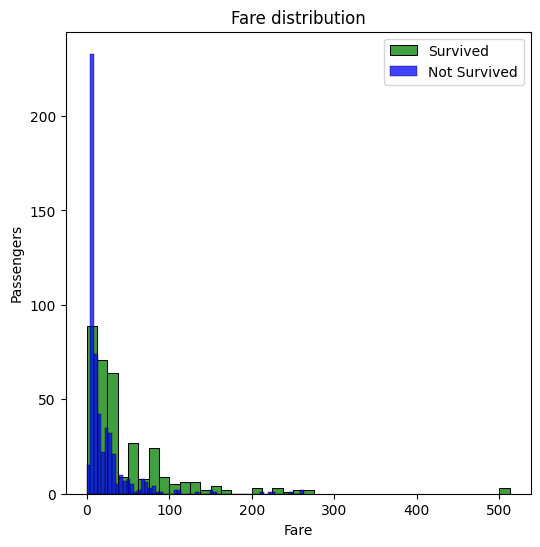

In [45]:
fig, axes = plt.subplots(figsize=(6, 6))
axes.set_ylabel('Passengers')
axes.set_title('Fare distribution')
sns.histplot(df_t[df_t['Survived'] == 1]['Fare'], kde=False, color='green')
sns.histplot(df_t[df_t['Survived'] == 0]['Fare'], kde=False, color='blue')
axes.legend(['Survived', 'Not Survived'])

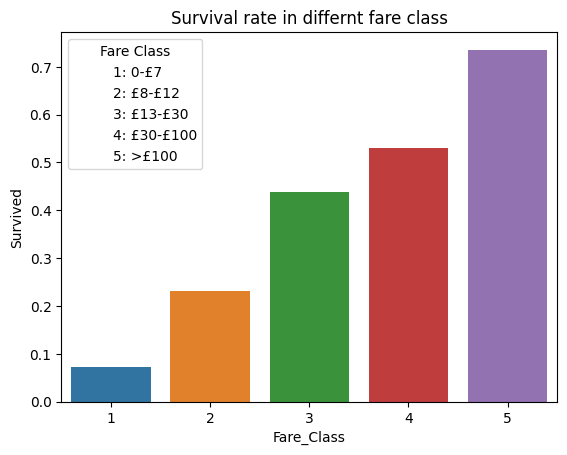

In [46]:
# Create a bar chart to show the survival among different fare group
ax_1 = sns.barplot(data=df_t, x='Fare_Class', y='Survived', errorbar=None)

ax_1.set_xlabel("Fare Class")
ax_1.set_ylabel("Survived")

sns.barplot(data=df_t, x='Fare_Class', y='Survived', errorbar=None)
plt.title("Survival rate in differnt fare class")

fare_class_labels = {
    1: "1: 0-£7",
    2: "2: £8-£12",
    3: "3: £13-£30",
    4: "4: £30-£100",
    5: "5: >£100"
}

# Create custom legend handles and labels
handles = [plt.Rectangle((0, 0), 1, 1, color=ax_1.get_facecolor()) for _ in fare_class_labels]
labels = list(fare_class_labels.values())

# Create the legend using handles and labels
plt.legend(handles, labels, title="Fare Class")

plt.show()


<strong>Older people generally paid the higher fares:</font>

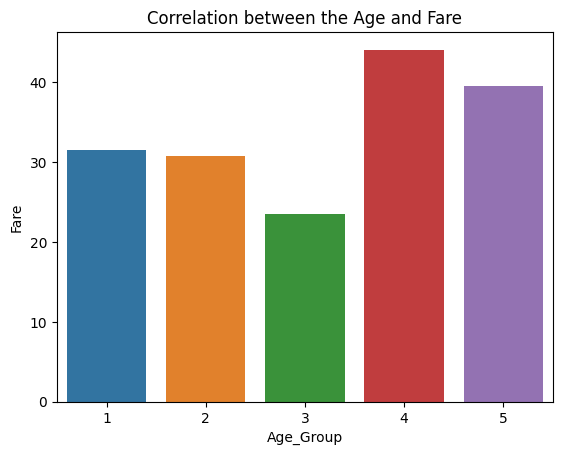

In [47]:
#create a bar graph with the correlation between Age_Class and Fare

sns.barplot(data=df_t,x='Age_Group',y="Fare", errorbar=None)
plt.title("Correlation between the Age and Fare")
plt.show()

<strong>Many people may pay more than it needs for the tickets:</font>

Fare price in 1912:

Third Class: £7

Second Class: £12

First Class Berth: £30

First class suite: £870

If we look at the outliers for the fare price, it is likely people paying much more than the standard price.

Text(0, 0.5, 'Fare')

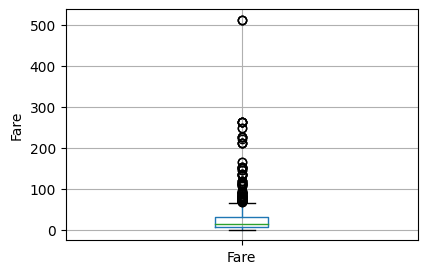

In [48]:
# Create boxplot for the fare

plt.figure(figsize=(10,3))
plt.subplot(1, 2, 2)
fig = df_t.boxplot(column='Fare')
fig.set_title('')
fig.set_ylabel('Fare')

### SibSp & Parch:

<strong>Passengers who were alone had a lower chance to get rescued:</font>

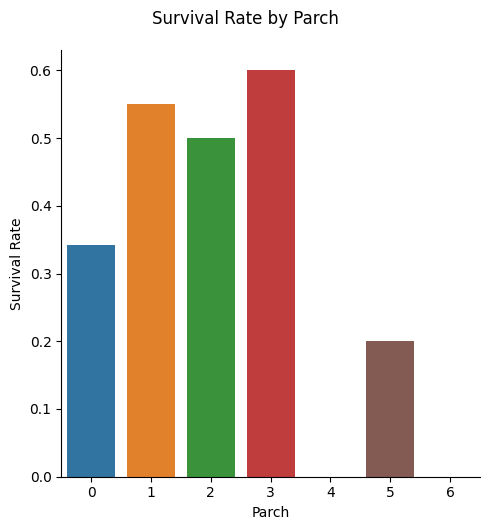

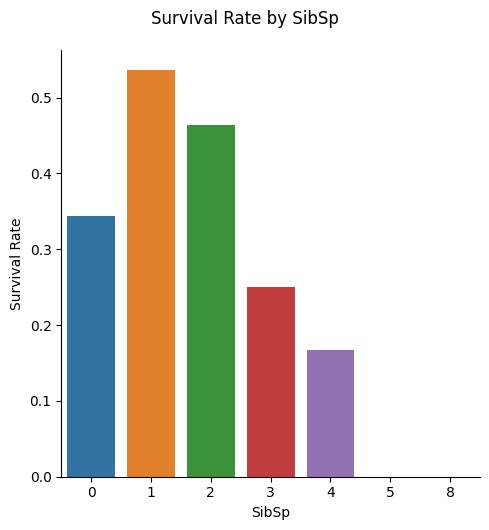

In [49]:
# Bar chart for Parch vs. Survived
g1 = sns.catplot(x='Parch', y='Survived', data=df_t, kind='bar', errorbar=None)
g1.fig.suptitle("Survival Rate by Parch", y=1.05)
plt.xlabel("Parch")
plt.ylabel("Survival Rate")
plt.show()

# Bar chart for SibSp vs. Survived
g2 = sns.catplot(x='SibSp', y='Survived', data=df_t, kind='bar', errorbar=None)
g2.fig.suptitle("Survival Rate by SibSp", y=1.05)
plt.xlabel("SibSp")
plt.ylabel("Survival Rate")
plt.show()

### Embarked location:

<strong>People embarked in Cherbourg had higher chance to survive:</strong>

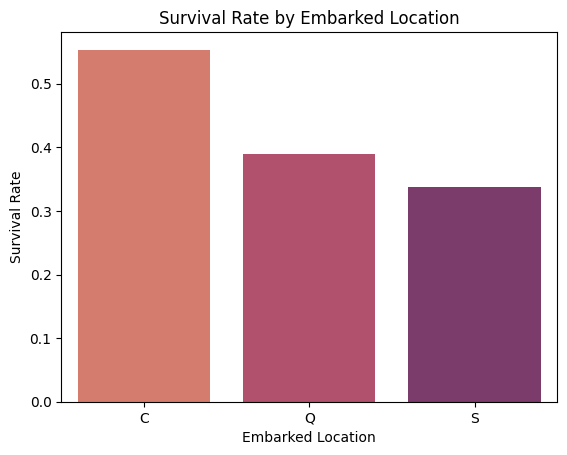

In [50]:
# Calculate the survival rate by Embarked
survival_rate = df_t.groupby('Embarked')['Survived'].mean().reset_index()

# Bar chart for Survival Rate vs. Embarked
sns.barplot(x='Embarked', y='Survived', data=survival_rate, palette='flare')
plt.title("Survival Rate by Embarked Location")
plt.xlabel("Embarked Location")
plt.ylabel("Survival Rate")
plt.show()

In conclusion, the correlations of different variables with survival were explored.The strong and significant correlations include gender, Pclass and fare/fare class. There are some significant but weak correlations with parch, age group and embarked location.